## Train / Test Split
Um die trainierten Models zu überprüfen, werden wir das Datenset in Train/Test Sets aufteilen.


<AxesSubplot:>

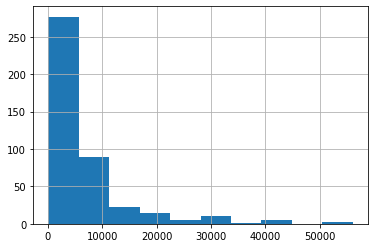

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd

import src.package.shared as sh
import src.package.consts as c
import src.package.charts as charts
import src.package.importer as im

pd.set_option('display.max_rows', 500)

df = im.get_dataset('../package/datasets/full_dataset.csv')
df = df.dropna(subset=[c.FIELD_USAGE_CLUSTER, c.FIELD_AREA_TOTAL_FLOOR_416, c.FIELD_AREA_MAIN_USAGE])

df[c.FIELD_AREA_TOTAL_FLOOR_416].hist()

#### GF for Stratify

In [2]:
# create distribution classes for GF
distribution_bins = 10
labels = list(range(0, distribution_bins))
df['gf_cat'] = pd.qcut(df[c.FIELD_AREA_TOTAL_FLOOR_416], distribution_bins, labels=labels)
df['gf_cat'].value_counts()

0    43
1    43
2    43
4    43
5    43
7    43
8    43
9    43
3    42
6    42
Name: gf_cat, dtype: int64

#### Train & Test Set
Save train & test set to CSV

In [3]:
# stratify=df[[c.FIELD_USAGE_CLUSTER, 'gf_cat']] multiple stratify columns?
train_set, test_set = train_test_split(df, test_size=0.2, random_state=0, stratify=df['gf_cat'])

# remove field gf_cat
train_set = train_set.drop(columns=['gf_cat'])
test_set = test_set.drop(columns=['gf_cat'])

# save train set
file_path_train = sh.export_directory_path('train_set.csv')
train_set.to_csv(file_path_train, index=False, sep=';')

# save test set
file_path_test = sh.export_directory_path('test_set.csv')
test_set.to_csv(file_path_test, index=False, sep=';')

#### Analyse Train-Set

count      342.000000
mean      6254.923977
std       8259.234042
min        104.000000
25%       1383.500000
50%       3185.500000
75%       7586.000000
max      51100.000000
Name: area_total_floor_416, dtype: float64
WOHNEN           0.304094
SCHULEN          0.254386
BUERO            0.096491
HALLEN           0.087719
BETRIEB          0.081871
BEHERBERGUNG     0.073099
KULTUS_KULTUR    0.029240
GESUNDHEIT       0.023392
ANDERES          0.023392
TECHNIK          0.008772
OFFENE_BAUTEN    0.008772
IRRELEVANT       0.005848
AUSSENANLAGEN    0.002924
Name: usage_cluster, dtype: float64


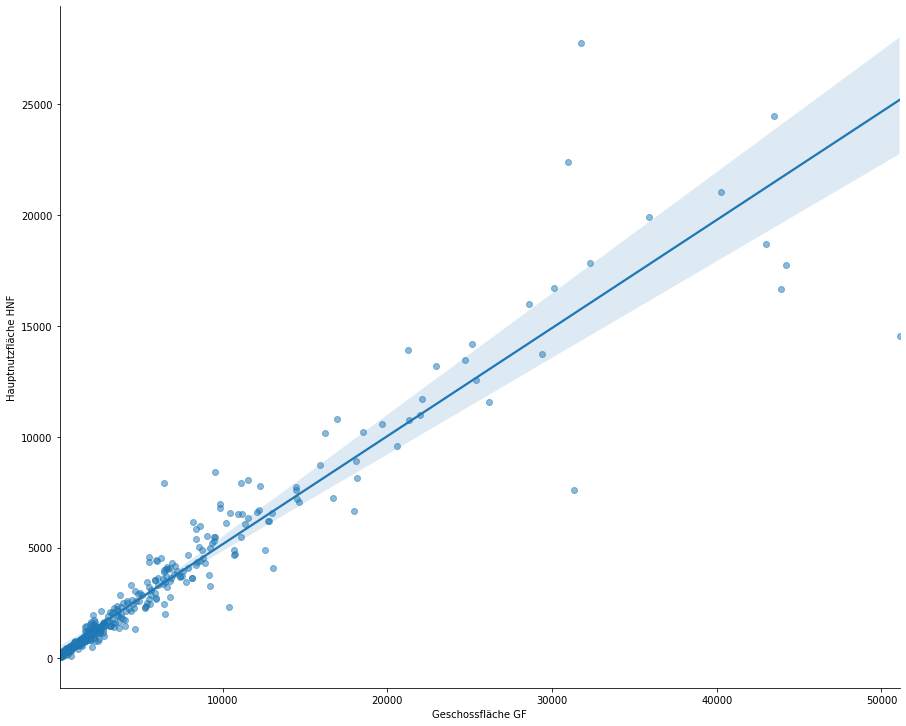

In [4]:
print(train_set[c.FIELD_AREA_TOTAL_FLOOR_416].describe())
print(train_set[c.FIELD_USAGE_CLUSTER].value_counts(normalize=True))
charts.lmplot_gf_hnf(train_set)

#### Analyse Test-Set

count       86.000000
mean      6426.418605
std       8905.499755
min        195.000000
25%       1352.000000
50%       3142.000000
75%       7106.750000
max      56112.000000
Name: area_total_floor_416, dtype: float64
WOHNEN           0.313953
SCHULEN          0.267442
HALLEN           0.139535
BEHERBERGUNG     0.081395
BUERO            0.081395
GESUNDHEIT       0.046512
BETRIEB          0.034884
ANDERES          0.023256
KULTUS_KULTUR    0.011628
Name: usage_cluster, dtype: float64


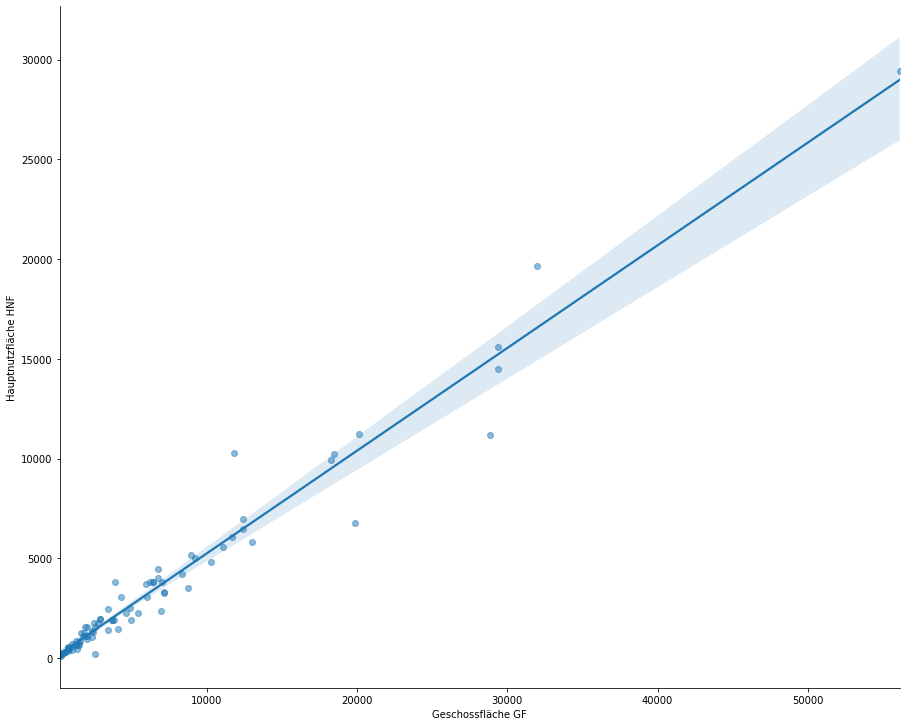

In [5]:
print(test_set[c.FIELD_AREA_TOTAL_FLOOR_416].describe())
print(test_set[c.FIELD_USAGE_CLUSTER].value_counts(normalize=True))
charts.lmplot_gf_hnf(test_set)